In [1]:
import nltk
import pickle
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./DataSet/data.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.shape

(20800, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [6]:
#remove nan value
df = df.dropna()

In [7]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [8]:
messages=df.copy()

In [9]:
#reset index
messages.reset_index(inplace=True)

In [10]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [11]:
corpus = []

# apply text preprocessing on text column (Remove StopWord, then apply Lematization)

In [12]:
from nltk.stem import WordNetLemmatizer #Lemmalizer
from nltk.corpus import stopwords 

In [13]:
wn = WordNetLemmatizer()

In [14]:
for i in range(len(messages.index)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ wn.lemmatize(word) for word in review if not word in set(stopwords.words('english')) ]
    review = ' '.join(review)
    corpus.append(review)

In [15]:
corpus[6]

'paris france chose idealistic traditional candidate sunday primary represent socialist party presidential election spring candidate beno hamon ran slogan would make france heart beat bested manuel valls former prime minister whose campaign promoted policy strong background mr hamon appeared wide margin incomplete return showing estimated percent vote mr valls percent tonight left hold head high looking future mr hamon said addressing supporter country need left modern innovative left said mr hamon victory clearest sign yet voter left want break policy president fran ois hollande december announced would seek however mr hamon strong showing unlikely change widespread assessment candidate little chance making second round voting general election first round general election set april runoff may socialist party deeply divided one measure lack popular enthusiasm relatively low number people voting two million people voted second round primary sunday contrast million second round last pres

In [16]:
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=10000,ngram_range=(2,2))
X=tfidf_v.fit_transform(corpus).toarray()

In [17]:
filename = 'transform.pkl'
pickle.dump(tfidf_v, open(filename, 'wb'))

In [18]:
tfidf_v.get_feature_names()[:20]

['aaron klein',
 'aaronkleinshow follow',
 'abc news',
 'abc week',
 'abedin email',
 'able find',
 'able get',
 'able keep',
 'able make',
 'able see',
 'able take',
 'abortion right',
 'abraham lincoln',
 'absentee ballot',
 'absolutely nothing',
 'abu sayyaf',
 'abuse power',
 'academy award',
 'academy science',
 'accept result']

In [19]:
X.shape

(18285, 10000)

In [20]:
y = messages['label']

In [21]:
y.shape

(18285,)

In [22]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)

# MultinomialNB Algorithm

In [23]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [24]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
from sklearn import metrics
import numpy as np
import itertools

In [28]:
MultinomialNB_accu = metrics.accuracy_score(y_test, y_pred)
print(f"accuracy: {MultinomialNB_accu}")

accuracy: 0.9224523612261806


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      3508
           1       0.95      0.86      0.90      2527

    accuracy                           0.92      6035
   macro avg       0.93      0.91      0.92      6035
weighted avg       0.92      0.92      0.92      6035



Confusion matrix, without normalization


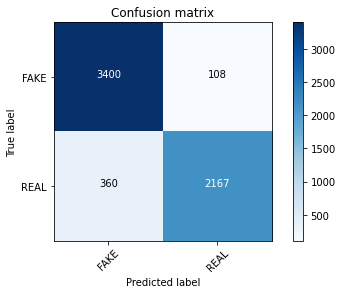

In [30]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Passive Aggressive Classifier Algorithm

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:  0.9376967688483844
Confusion matrix, without normalization


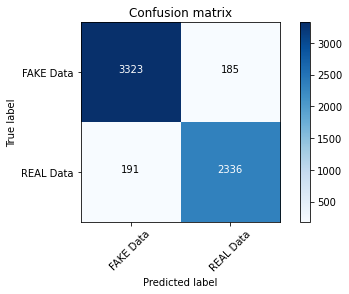

In [32]:
linear_clf.fit(X_train, y_train)
y_pred = linear_clf.predict(X_test)
PassiveAggressiveClassifier_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"accuracy:  {PassiveAggressiveClassifier_accuracy}" )
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3508
           1       0.93      0.92      0.93      2527

    accuracy                           0.94      6035
   macro avg       0.94      0.94      0.94      6035
weighted avg       0.94      0.94      0.94      6035



In [34]:
filename = 'model_pickle.pkl'
pickle.dump(linear_clf, open(filename, 'wb'))

# Multinomial Classifier with Hyperparameter

In [35]:
classifier=MultinomialNB(alpha=0.1)

In [36]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_clasifier = MultinomialNB(alpha=alpha)
    sub_clasifier.fit(X_train, y_train)
    y_pred = sub_clasifier.predict(X_test)
    sub_clasifier_accuracy = metrics.accuracy_score(y_test, y_pred)
    if sub_clasifier_accuracy > previous_score:
        classifier = sub_clasifier
        previous_score = sub_clasifier_accuracy
    print(f"Alpha --> {alpha}, Accuracy --> {sub_clasifier_accuracy}, Previous Score --> {previous_score}")

e:\mtech project nlp\env\lib\site-packages\sklearn\naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha --> 0.0, Accuracy --> 0.9267605633802817, Previous Score --> 0.9267605633802817
Alpha --> 0.1, Accuracy --> 0.9259320629660315, Previous Score --> 0.9267605633802817
Alpha --> 0.2, Accuracy --> 0.9254349627174814, Previous Score --> 0.9267605633802817
Alpha --> 0.30000000000000004, Accuracy --> 0.9242750621375311, Previous Score --> 0.9267605633802817
Alpha --> 0.4, Accuracy --> 0.923777961888981, Previous Score --> 0.9267605633802817
Alpha --> 0.5, Accuracy --> 0.9234465617232809, Previous Score --> 0.9267605633802817
Alpha --> 0.6000000000000001, Accuracy --> 0.9231151615575808, Previous Score --> 0.9267605633802817
Alpha --> 0.7000000000000001, Accuracy --> 0.9232808616404308, Previous Score --> 0.9267605633802817
Alpha --> 0.8, Accuracy --> 0.9227837613918807, Previous Score --> 0.9267605633802817
Alpha --> 0.9, Accuracy --> 0.9224523612261806, Previous Score --> 0.9267605633802817


In [37]:
## Get Features names
feature_names = tfidf_v.get_feature_names()

In [38]:
linear_clf.coef_[0]

array([-0.82505212, -0.66343548, -0.08596951, ..., -0.48096083,
        0.29584159,  0.59561618])

In [39]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

e:\mtech project nlp\env\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-4.948026755849267, 'hillary clinton'),
 (-5.350348746867377, 'donald trump'),
 (-5.79748581011568, 'united state'),
 (-6.066845728043528, 'clinton campaign'),
 (-6.095923652591055, 'year old'),
 (-6.137565364627393, 'de la'),
 (-6.232230393470344, 'new york'),
 (-6.236842495227051, 'white house'),
 (-6.258094471789169, 'twitter com'),
 (-6.320938291619322, 'clinton foundation'),
 (-6.383392206358227, 'bill clinton'),
 (-6.448659119093969, 'mainstream medium'),
 (-6.506750281856519, 'presidential election'),
 (-6.520542096113157, 'pic twitter'),
 (-6.576655550178383, 'http co'),
 (-6.576727960125579, 'saudi arabia'),
 (-6.6175956087357095, 'secretary state'),
 (-6.653887308206244, 'american people'),
 (-6.662589039171909, 'http www'),
 (-6.685492818529804, 'john podesta')]

In [40]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-33.16341366529506, 'aaronkleinshow follow'),
 (-33.16341366529506, 'abc week'),
 (-33.16341366529506, 'account mr'),
 (-33.16341366529506, 'adelle nazarian'),
 (-33.16341366529506, 'adviser michael'),
 (-33.16341366529506, 'adviser mr'),
 (-33.16341366529506, 'agency mr'),
 (-33.16341366529506, 'ago mr'),
 (-33.16341366529506, 'air siriusxm'),
 (-33.16341366529506, 'allegation mr'),
 (-33.16341366529506, 'ally mr'),
 (-33.16341366529506, 'along mr'),
 (-33.16341366529506, 'although mr'),
 (-33.16341366529506, 'amendment columnist'),
 (-33.16341366529506, 'america mr'),
 (-33.16341366529506, 'american airline'),
 (-33.16341366529506, 'analyst armed'),
 (-33.16341366529506, 'android phone'),
 (-33.16341366529506, 'anonymity discus'),
 (-33.16341366529506, 'anything mr')]